### The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

### 1. Import usefull libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### 2. Import data set

In [2]:
df = pd.read_csv(r'abalone.csv')

#### a) Displaying the top 5 row of dataset

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### b) Shape of data set

In [4]:
df.shape

(4177, 9)

#### c) Displaying info about dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


##### Outcome : 
1. There are total 9 column in the data set.
2. 'Sex' is object data type.
3. 'Rings' is int data type.
4. Rest are float data type.
5. Except 'Rings' all are the 'features' for our model.
6. 'Rings' is our target variable as per problem statement.
7. No null value present in the data set.

#### d) Cross checking the null value

In [6]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

##### Outcome : Look like there is no null value in the data set

### 3. Delaing with object datatype

#### a) Checking the total count for different category

In [7]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

##### Outcome : 
1. It is an categorical variable which have 3 category.
2. We have to deal it so that our model easily understand the data set & provide best result

#### b) We find that data is not imbalanced. We can proceed further and plot countplot to see the frequency

<AxesSubplot:xlabel='Sex', ylabel='count'>

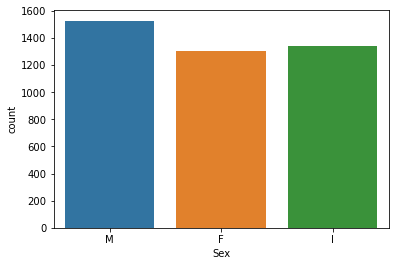

In [8]:
sns.countplot(x='Sex',data=df)

#### b) As We Have Categorical Column('Sex'), We Need To Convert Into Numerical Data .
* Convert 'F' as 0,'M' as 1 & 'I' as 2

In [9]:
df['Sex'] = df['Sex'].replace({'F':0,'M':1,'I':2})
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### c) After converting the value cross check the result 

In [10]:
df['Sex'].value_counts()

1    1528
2    1342
0    1307
Name: Sex, dtype: int64

### 4. Correlation matrix to see the coffecient of multicolinearity

#### a). Correlation matrix in form of Data Frame

In [11]:
df_corr = df.corr().abs()
df_corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,0.503697,0.516450,0.477850,0.501511,0.459731,0.505693,0.499103,0.401445
Length,0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


#### b). Visualize Correlation matrix using heatmap

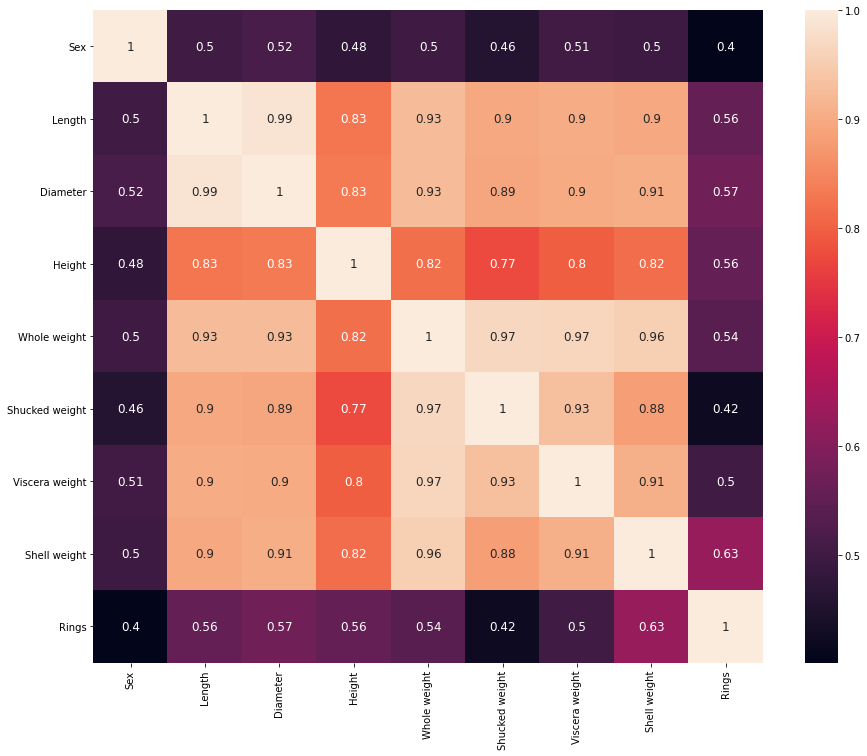

In [12]:
plt.figure(figsize=(15,12))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.show()

##### Outcome : 
1. Every feature have positive correlation with target variable.
2. 'Shell weight' has 63 percentage correaltion with target column which can be consider as strong bond.
3. 'Diameter' has 57 percentage correaltion with target column which can be consider as strong bond.
4. 'Length' and 'Height' have 56 percentage correaltion with target column which can be consider as strong bond.
5. 'Whole weight' has 54 percentage correaltion with target column which can be consider as strong bond.
6. 'Viscera weight' has 50 percentage correaltion with target column which can be consider as good bond.
7. 'Shucked weight' has 42 percentage correaltion with target column which can be consider as good bond.
8. 'Sex' has 40 percentage correaltion with target column which can be consider as good bond.

### 5. Describe the data set

In [13]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.008379,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.796410,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### Visualize the describe data

<AxesSubplot:>

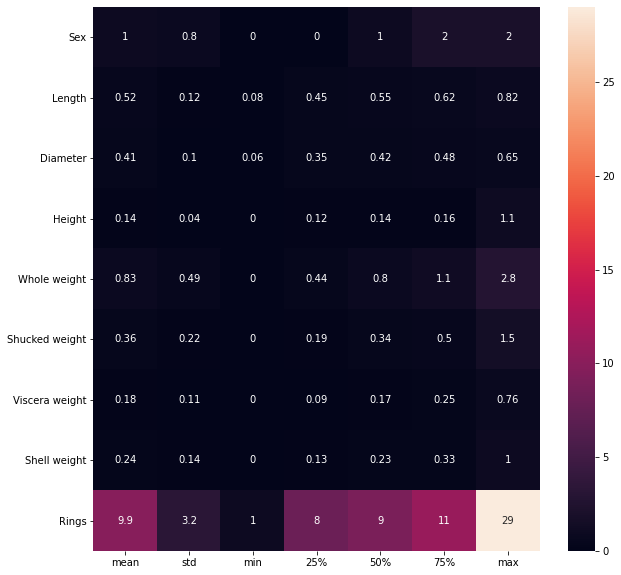

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True)

### 6. Checking whether data is normally distributed

#### a) By distribution plot

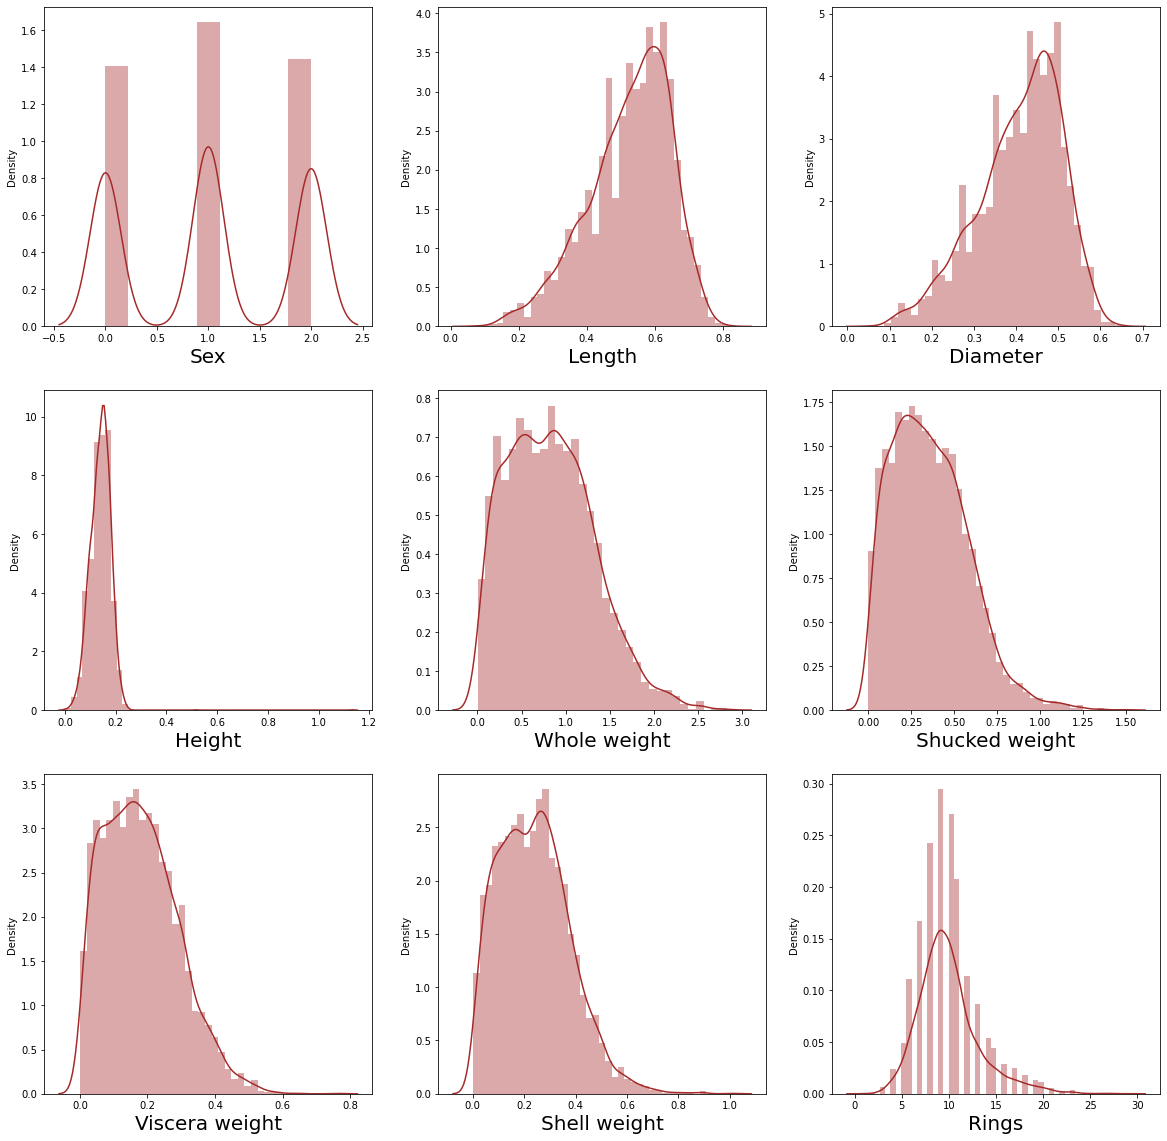

In [15]:
plt.figure(figsize=(20,20))
plot_number = 1
for col in df:
    if plot_number<=9:
        ax = plt.subplot(3,3,plot_number)   # plot is distributed in 3 row & 3 column
        sns.distplot(df[col],color='brown')           # plot displot for col which have all df column         
        plt.xlabel(col,fontsize = 20)
        
              
    plot_number+=1                           #increase plotnumber value by 1  
plt.show()

##### Outcomes :
1. As 'Rings' is our target variable as per problem statement.
2. Some features have skewness.Let's check it.

#### b). finding the skewness

In [16]:
df.skew()

Sex              -0.014980
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

#### c). Separating the target variable 

In [17]:
df_features = df.drop(columns='Rings',axis=1)
df_features

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


#### d) See the outlier's using boxplot

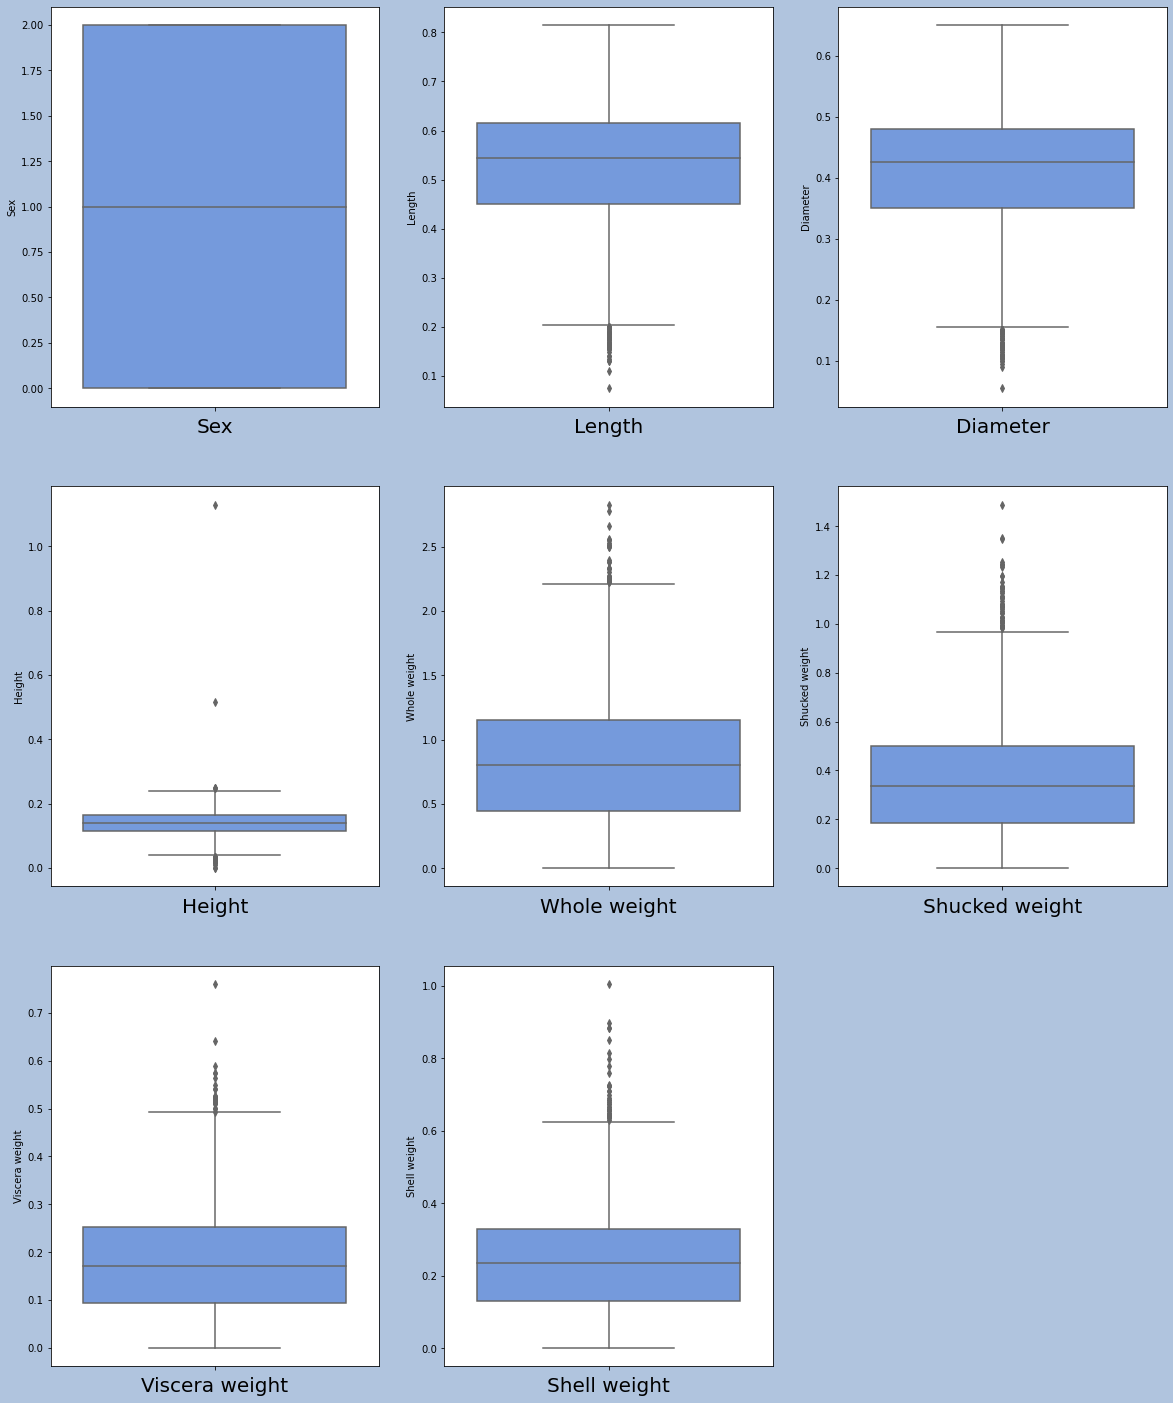

In [18]:
plt.figure(figsize=(20,25),facecolor='LightsteelBlue')
graph = 1

for colum in df_features:
    if graph<=30:
        ax = plt.subplot(3,3,graph)
        sns.boxplot(y=df_features[colum],color='Cornflowerblue')
        plt.xlabel(colum,fontsize = 20)
        
    graph+=1
plt.show() 

##### Outcome :
1. 'Age' is categorical variable there is no outlier's
2. 'Length' and 'Diameter' left skew i.e. lower side outlier's
3. 'Heigh' have both outlier's. However higher side has less outlier's
4. 'Whole weight' and 'Shucked weigth' have higher side outlier's
5. 'Viscera weight' and 'Shell Weight' have higher side outlier's

### 7. Data Cleaning

#### a). Dealing with outlier's using zscore

In [19]:
# using std as 3
# zscore is available in scipy.stats
# formula of zscore is : (x-mean)/std

from scipy.stats import zscore

z_score = zscore(df[['Length', 'Diameter', 'Height', 'Whole weight',
                     'Shucked weight', 'Viscera weight', 'Shell weight']])
abs_z_score = np.abs(z_score)

filter_entry = (abs_z_score<3).all(axis=1)

df = df[filter_entry]
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


#### b). Data Describe after remove outlier's

In [20]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,1.011753,0.522090,0.406308,0.138530,0.808404,0.350172,0.176579,0.233142,9.901567
std,0.798209,0.115709,0.095848,0.037001,0.457321,0.205827,0.103336,0.129482,3.164617
min,0.000000,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,3.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441000,0.185375,0.092875,0.130000,8.000000
50%,1.000000,0.540000,0.420000,0.140000,0.790750,0.332000,0.168500,0.230000,9.000000
75%,2.000000,0.610000,0.480000,0.165000,1.134750,0.494000,0.247000,0.320500,11.000000
max,2.000000,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,29.000000


#### c) Plot distribution plot again 

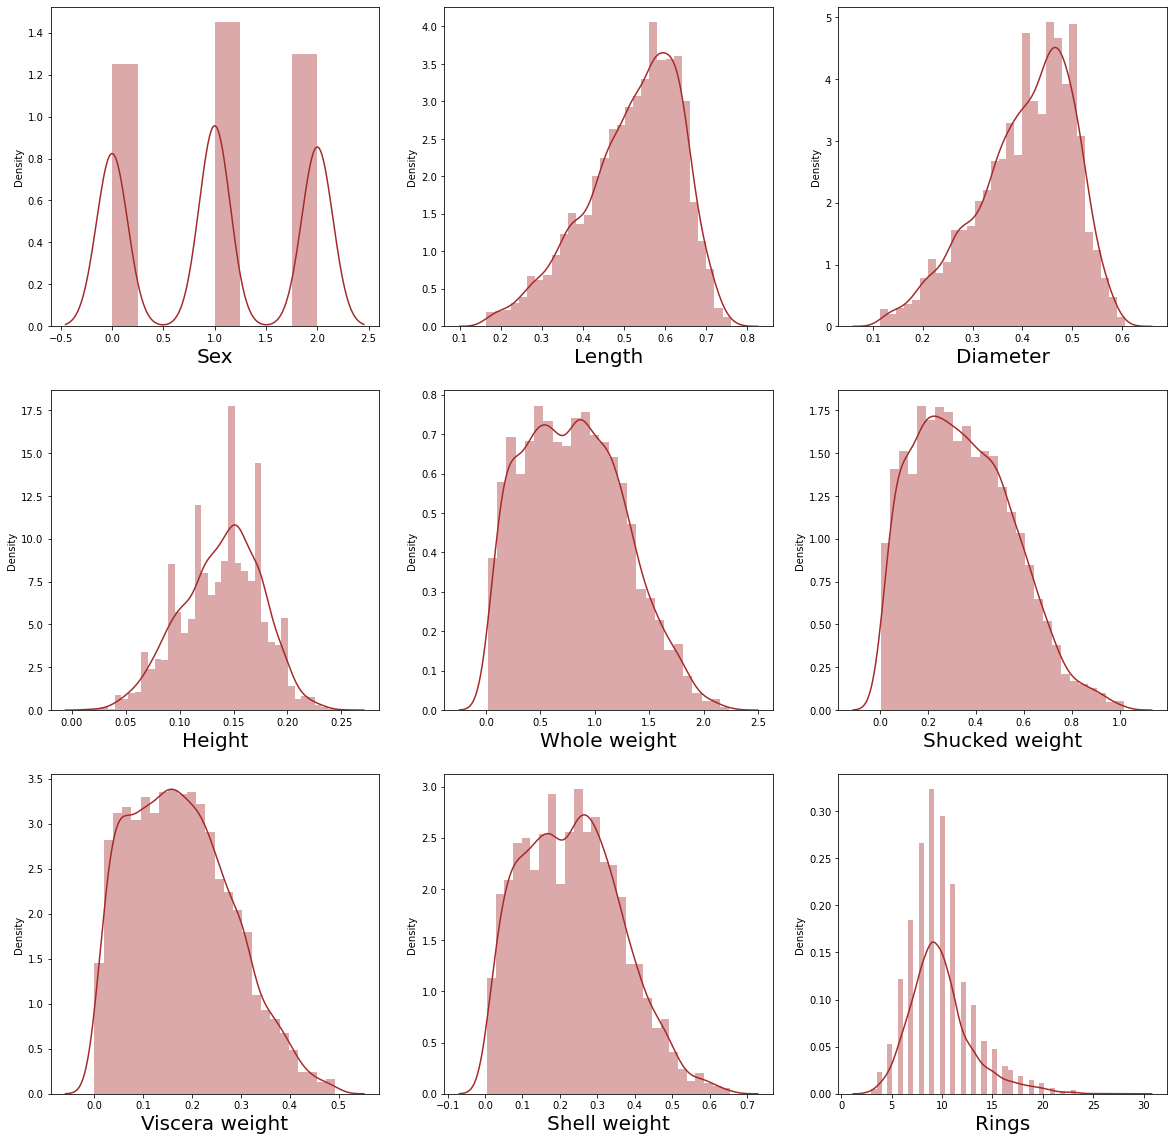

In [21]:
plt.figure(figsize=(20,20))
plot_number = 1
for col in df:
    if plot_number<=9:
        ax = plt.subplot(3,3,plot_number)   # plot is distributed in 4 row & 3 column
        sns.distplot(df[col],color='brown')           # plot displot for col which have all rwq column         
        plt.xlabel(col,fontsize = 20)
        
              
    plot_number+=1                           #increase plotnumber value by 1  
plt.show()

##### Outcome :
* Now data look like good. I can proceed further

#### d). Checking the percentage of loss 

In [22]:
print("The data loss after removing outlier's is :",(4177-4084)/4177*100)

The data loss after removing outlier's is : 2.2264783337323437


### 8. Selecting the independent variable as X and dependent variable as y

In [23]:
X = df.drop(columns='Rings',axis=1)
y = df['Rings']

In [24]:
print('The shape of X is :',X.shape)
print('The shape of y is :',y.shape)

The shape of X is : (4084, 8)
The shape of y is : (4084,)


### 9. Initiate our model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [26]:
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
svr = SVR()

### 10. Split the our data set into train & test split 

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_scaled

array([[0.5       , 0.48739496, 0.51020408, ..., 0.21651013, 0.20426829,
        0.22307692],
       [0.5       , 0.31092437, 0.30612245, ..., 0.09293129, 0.09756098,
        0.1       ],
       [0.        , 0.61344538, 0.62244898, ..., 0.24814632, 0.28658537,
        0.31538462],
       ...,
       [0.5       , 0.73109244, 0.73469388, ..., 0.51408799, 0.58333333,
        0.46615385],
       [0.        , 0.77310924, 0.75510204, ..., 0.51952546, 0.52947154,
        0.44769231],
       [0.5       , 0.91596639, 0.89795918, ..., 0.9293129 , 0.76422764,
        0.75384615]])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.40, random_state=341) 

In [32]:
print('The shape of X-Training set is :',X_train.shape)
print('The shape of y-Training set is :',y_train.shape)
print('The shape of X-Test set is :',X_test.shape)
print('The shape of y-Test set is :',y_test.shape)

The shape of X-Training set is : (2450, 8)
The shape of y-Training set is : (2450,)
The shape of X-Test set is : (1634, 8)
The shape of y-Test set is : (1634,)


### 11. Fit the model

In [33]:
lr.fit(X_train,y_train)
knr.fit(X_train,y_train)
dtr.fit(X_train,y_train)
rfr.fit(X_train,y_train)
svr.fit(X_train,y_train)

print('All model are trained')

All model are trained


### 12. Observing the of model

#### a). Predicting the value on test set from different model

In [34]:
y_pred_lr = lr.predict(X_test)
y_pred_knr = knr.predict(X_test)
y_pred_dtr = dtr.predict(X_test)
y_pred_rfr = rfr.predict(X_test)
y_pred_svr = svr.predict(X_test)

#### b). Dispalying the score of each model for training data set

In [35]:
print('The score of Linear Regression is:',lr.score(X_train,y_train))
print('The score of KNN Regressor is:',knr.score(X_train,y_train))
print('The score of Decision Tree Regressor is:',dtr.score(X_train,y_train))
print('The score of Randomforest Regressor is:',rfr.score(X_train,y_train))
print('The score of Support Vector Regressor is:',svr.score(X_train,y_train))

The score of Linear Regression is: 0.5404257466130017
The score of KNN Regressor is: 0.6454822459308323
The score of Decision Tree Regressor is: 1.0
The score of Randomforest Regressor is: 0.9329429777067413
The score of Support Vector Regressor is: 0.526427794704976


#### c). Dispalying the score of each model for testing data set

In [36]:
print('The score of Linear Regression is:',lr.score(X_test,y_test))
print('The score of KNN Regressor is:',knr.score(X_test,y_test))
print('The score of Decision Tree Regressor is:',dtr.score(X_test,y_test))
print('The score of Randomforest Regressor is:',rfr.score(X_test,y_test))
print('The score of Support Vector Regressor is:',svr.score(X_test,y_test))

The score of Linear Regression is: 0.5130473060685548
The score of KNN Regressor is: 0.47075150932835297
The score of Decision Tree Regressor is: 0.03983278977933058
The score of Randomforest Regressor is: 0.5287443203059243
The score of Support Vector Regressor is: 0.5083359047501247


### Conclusion :
#### For given data set as i observed Randomforest Regressor provide best score for both training & testing data set

In [38]:
import pickle

In [39]:
# saving the model to a local file system

final_result = 'The age of abalone.pickle'
pickle.dump(rfr,open(final_result,'wb'))